# COGS 303: Final Project
##### By Sandra Radic, Jazzy Wan, & Paige Whitehead

For a full analysis and guidance on how to best reproduce our code, please see our [Project Report](https://docs.google.com/document/d/1sKX7fC1uAy1YflMa3S0RuqWhn55LQuIyY6_xGBQOPzQ/edit?usp=sharing).

## Model 1 (from class)

- importing data (.csv file)
- visualizing model
- plotting real data against model
- calculating likelihood

**Hypothesis:** People compare their own level of success to a
potential role model and then copy their strategy with a probability proportional
to the difference in success levels.

In [1]:
import pandas as pd

file = "real_data_final_project.csv"

real_data = pd.read_csv(file, header = 12)
real_data

,x,y,color,pen down?
0,0,0,0,True
1,1,17,0,True
2,2,17,0,True
3,3,29,0,True
4,4,33,0,True
5,5,34,0,True
6,6,28,0,True
7,7,33,0,True
8,8,41,0,True
9,9,54,0,True


In [2]:
file_2 = "test_sim_2.csv"

model_1 = pd.read_csv(file_2, header = 6)
model_1

,[run number],correlation,mutation_rate,[step],count turtles with [strategy = 5]
0,2,0,0,0,7
1,3,0,0,0,12
2,6,0,0,0,12
3,4,0,0,0,11
4,8,0,0,0,11
...,...,...,...,...,...
409995,9987,0,0,36,121
409996,9987,0,0,37,121
409997,9987,0,0,38,121
409998,9987,0,0,39,121


<function matplotlib.pyplot.show(close=None, block=None)>

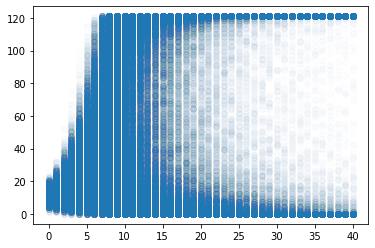

In [3]:
import matplotlib.pyplot as plt

steps = model_1['[step]']
freq = model_1['count turtles with [strategy = 5]']

plt.plot(steps, freq, 'o', alpha = 0.01)
plt.show

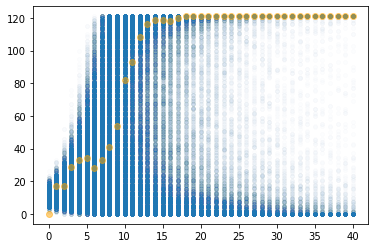

In [4]:
x = real_data['x']
y = real_data['y']

steps = model_1['[step]']
freq = model_1['count turtles with [strategy = 5]']

plt.plot(steps, freq, "o", alpha=0.01, markersize=4)
plt.plot(x,y,'o', color = 'orange', alpha = 0.5)
plt.show()

In [5]:
import numpy as np

step = [i + 1 for i in range(40)] #take every entry in range and increase it by 1
likelihoods = []
for i in step:

    selector = model_1['[step]'] == i

    #compute probability distribution

    freqs_at_step = model_1[selector]['count turtles with [strategy = 5]']
    counts = freqs_at_step.value_counts().values
    prob = counts / 10000
    freq = freqs_at_step.value_counts().index
    prob_dist = pd.DataFrame(prob, index = freq)

    #find likelihood

    observed = real_data['y'][i]
    likelihood = prob_dist.at[observed,0]
    likelihoods.append(likelihood)

np.array(likelihoods).prod()

3.5261790149148374e-36

## Model 2 

- importing data (.csv file) <br>
  This model is run using `model_1.csv`, which has both its' parameters set to 0. However, because we encounter error    119, we ran additional trials using 0.05 (`mutation_0.05.csv`), 0.5 (`mutation_0.5.csv`), and 0.8 (`mutation_0.8.csv`). These .csv files are attached to the assignment if you choose to run them, and our methodology choices are further explained in our [report](https://docs.google.com/document/d/1sKX7fC1uAy1YflMa3S0RuqWhn55LQuIyY6_xGBQOPzQ/edit?usp=sharing). 
- visualizing model
- plotting real data against model
- calculating likelihood

**Hypothesis:** Maybe people don’t need to assess your own level of success. Copy behavior
could be motivated entirely by the other person’s success.

In [19]:
model_2_file = "model_2.csv"

model_2_data = pd.read_csv(model_2_file, header = 6)
model_2_data

,[run number],correlation,mutation_rate,[step],count turtles with [strategy = 5]
0,6,0,0,0,10
1,4,0,0,0,8
2,2,0,0,0,13
3,3,0,0,0,12
4,7,0,0,0,13
...,...,...,...,...,...
409995,9996,0,0,36,0
409996,9996,0,0,37,0
409997,9996,0,0,38,0
409998,9996,0,0,39,0


<function matplotlib.pyplot.show(close=None, block=None)>

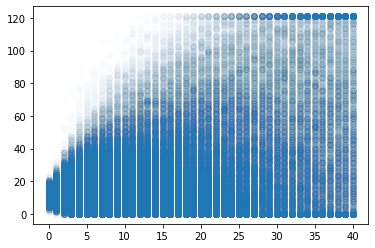

In [20]:
steps = model_2_data['[step]']
freq = model_2_data['count turtles with [strategy = 5]']

plt.plot(steps, freq, 'o', alpha = 0.01)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

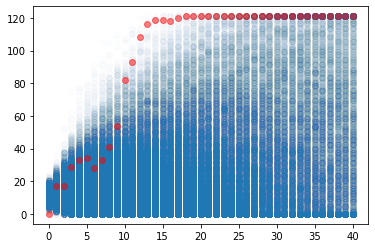

In [21]:
steps = model_2_data['[step]']
freq = model_2_data['count turtles with [strategy = 5]']

plt.plot(steps, freq, 'o', alpha = 0.01)
plt.plot(x,y,'o', color = 'red', alpha = 0.5)
plt.show

In [22]:
step = [i + 1 for i in range(40)] #take every entry in range and increase it by 1
likelihoods = []
for i in step:

    selector = model_2_data['[step]'] == i

    #compute probability distribution

    freqs_at_step = model_2_data[selector]['count turtles with [strategy = 5]']
    counts = freqs_at_step.value_counts().values
    prob = counts / 10000
    freq = freqs_at_step.value_counts().index
    prob_dist = pd.DataFrame(prob, index = freq)

    #find likelihood

    observed = real_data['y'][i]
    likelihood = prob_dist.at[observed,0]
    likelihoods.append(likelihood)

np.array(likelihoods).prod()

KeyError: 119

## Model 3

- importing data (.csv file)
- visualizing model
- plotting real data against model
- calculating likelihood

**Hypothesis:** Maybe people don’t need to know the other person’s level of success.
Copying behavior could be motivated by dissatisfaction.

In [23]:
import pandas as pd

file = "10000 runs of 0 correlation and mutation.csv"

model_3 = pd.read_csv(file,header=6)
model_3

,[run number],correlation,mutation_rate,[step],count turtles with [strategy = 5]
0,3,0,0,0,11
1,5,0,0,0,7
2,6,0,0,0,15
3,4,0,0,0,15
4,2,0,0,0,7
...,...,...,...,...,...
409995,9999,0,0,40,0
409996,10000,0,0,37,121
409997,10000,0,0,38,121
409998,10000,0,0,39,121


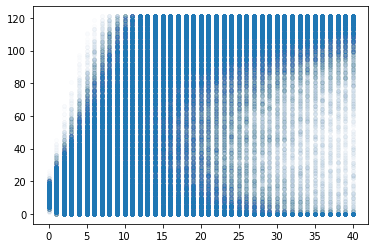

In [24]:
steps = model_3 ['[step]']
freq = model_3['count turtles with [strategy = 5]']

plt.plot(steps, freq, "o", alpha=0.01, markersize=4)
plt.show()

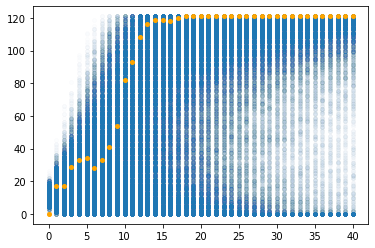

In [25]:
step_order = model_3['[step]'].values
freq = model_3['count turtles with [strategy = 5]']

plt.plot(step_order,freq,'o',alpha=0.01, markersize=4)
plt.plot(x,y,'o',color="orange",alpha=1, markersize=4)
plt.show()

In [26]:
steps = [i + 1 for i in list(range(40))] # strangely, we need to skip the first entry in the range.
likelihoods = []

for i in steps:
    # create a selector to keep track of where we are
    selector = model_3['[step]'] == i # at step i, pull out all the

    # compute probability distribution
    freqs_at_step = model_3[selector]['count turtles with [strategy = 5]']
    counts = freqs_at_step.value_counts().values
    prob = counts / 10000
    freq = freqs_at_step.value_counts().index
    prob_dist = pd.DataFrame(prob,index=freq)
    
    # find the likelihood of the data
    observed = real_data['y'][i]
    likelihoods.append(prob_dist.at[observed,0])
    
np.array(likelihoods).prod()

9.031083393303031e-48

## Model 4

- importing data (.csv file)
- visualizing model
- plotting real data against model
- calculating likelihood

**Hypothesis:** Maybe people don’t need to generate a random number. Copying behavior
could be deterministic.

In [27]:
file_4 = "deterministicsim(10000).csv"

data_4 = pd.read_csv(file_4, header=6)
data_4

,[run number],correlation,mutation_rate,[step],count turtles with [strategy = 5]
0,2,0,0,0,11
1,5,0,0,0,15
2,3,0,0,0,5
3,4,0,0,0,4
4,3,0,0,1,2
...,...,...,...,...,...
409995,10000,0,0,36,121
409996,10000,0,0,37,121
409997,10000,0,0,38,121
409998,10000,0,0,39,121


<function matplotlib.pyplot.show(close=None, block=None)>

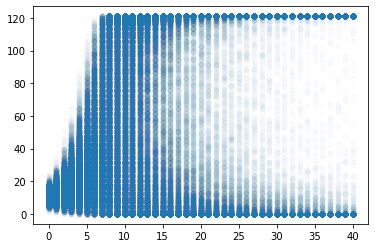

In [28]:
steps = data_4['[step]']
freq = data_4['count turtles with [strategy = 5]']

plt.plot (steps, freq, 'o', alpha=0.01, markersize=5)
plt.show

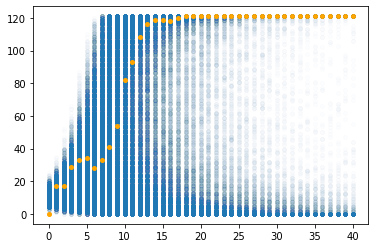

In [29]:
steps = data_4['[step]'].values
freq = data_4['count turtles with [strategy = 5]']

plt.plot(steps,freq,'o',alpha=.01, markersize=4)
plt.plot(x,y,'o',color="orange",alpha=1, markersize=4)
plt.show()

In [30]:
import numpy as np

steps = [i + 1 for i in list(range(40))]
likelihoods = []

for i in steps:
    
    selector = data_4['[step]'] == i 

    # compute probability distribution
    freqs_at_step = data_4[selector]['count turtles with [strategy = 5]']
    counts = freqs_at_step.value_counts().values
    prob = counts / 10000
    freq = freqs_at_step.value_counts().index
    prob_dist = pd.DataFrame(prob,index=freq)
    
    # find the likelihood of the data
    observed = real_data['y'][i]
    likelihoods.append(prob_dist.at[observed,0])
    
np.array(likelihoods).prod()

5.959094614172255e-36

## Calculating Posteriors

In [31]:
likelihood_1 = 3.5261790149148374e-36 #model 1 (from class) 
prior_1 = 0.5
likelihood_2 = 0 #model 2 
prior_2 = 0.5
likelihood_3 = 9.031083393303031e-48 #model 3 
prior_3 = 0.5
likelihood_4 = 5.959094614172255e-36 #model 4 
prior_4 = 0.5

posterior_1 = prior_1 * likelihood_1 / (prior_1 * likelihood_1 + prior_2 * likelihood_2 + prior_3 * likelihood_3 + prior_4 * likelihood_4)

posterior_2 = prior_2 * likelihood_2 / (prior_1 * likelihood_1 + prior_2 * likelihood_2 + prior_3 * likelihood_3 + prior_4 * likelihood_4)

posterior_3 = prior_3 * likelihood_3 / (prior_1 * likelihood_1 + prior_2 * likelihood_2 + prior_3 * likelihood_3 + prior_4 * likelihood_4)

posterior_4 = prior_4 * likelihood_4 / (prior_1 * likelihood_1 + prior_2 * likelihood_2 + prior_3 * likelihood_3 + prior_4 * likelihood_4)

posterior_1, posterior_2, posterior_3, posterior_4



(0.37175300922245047, 0.0, 9.521162748115287e-13, 0.6282469907765974)